In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize
import warnings
warnings.filterwarnings("ignore")

In [17]:
 #Read the data given
X = pd.read_csv('data (1).csv', header = None, names = ['A','B'])
X

,A,B
0,-0.666176,1.124497
1,-0.575134,0.323926
2,-0.709830,0.449826
3,-0.424223,0.697510
4,-0.856591,0.327999
...,...,...
3995,2.128128,-0.222255
3996,-1.118196,0.343862
3997,1.664419,-0.359806
3998,0.466162,-0.525737


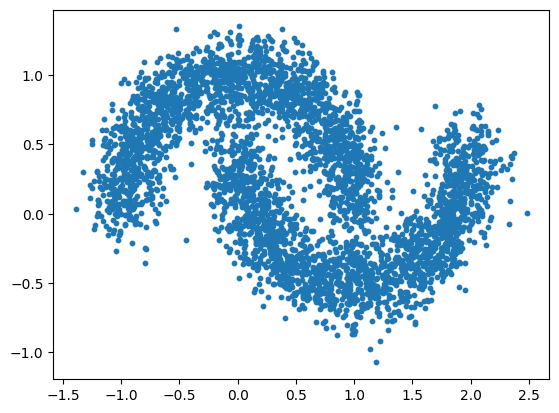

In [18]:
colors = ["red", "blue"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(X.A, X.B, cmap = colormap, s=10)

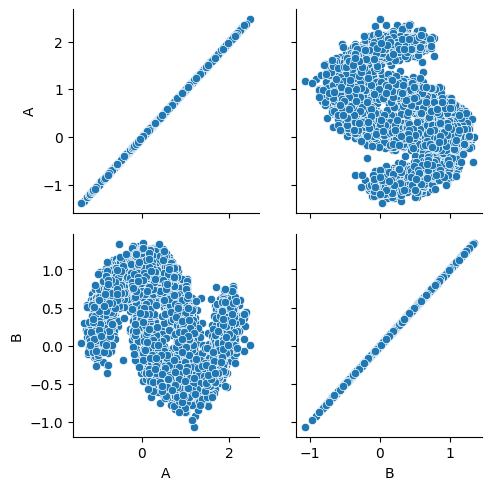

In [19]:
a = sns.PairGrid(X)
a.map(sns.scatterplot)

K-Means Clustering

In [20]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,
                  init = 'k-means++',
                  max_iter = 400,
                  n_init = 10,
                  random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

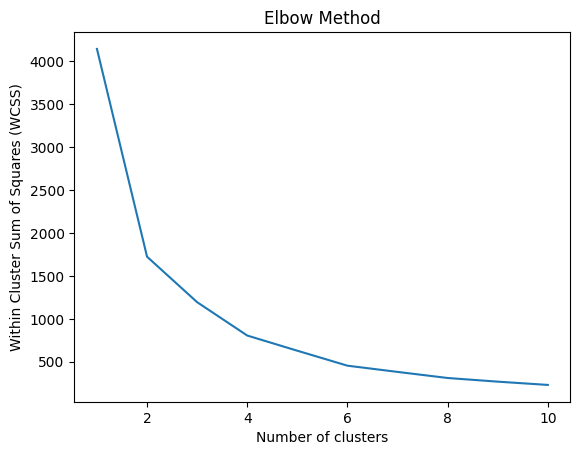

In [21]:
# Showing the elbow plot
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 2,            # Set amount of clusters
                init = 'k-means++',        # Initialization method for kmeans
                max_iter = 400,            # Maximum number of iterations
                n_init = 10,               # Choose how often algorithm will run with different centroid
                random_state = 0)          # Choose random state for reproducibility

In [23]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

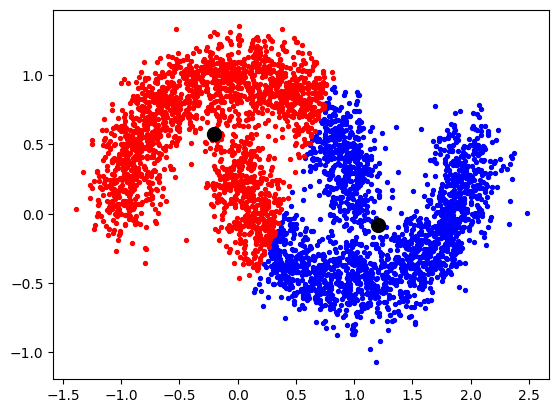

In [24]:
# Plotting the clusters
X = np.array(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=8, c='blue', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=8, c='red', label ='Cluster 2')

# Plot the clusters centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 100,
            c = 'black')
plt.show()

In [25]:
kmeans.cluster_centers_

array([[ 1.20859078, -0.07835484],
       [-0.20436027,  0.57321344]])

Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

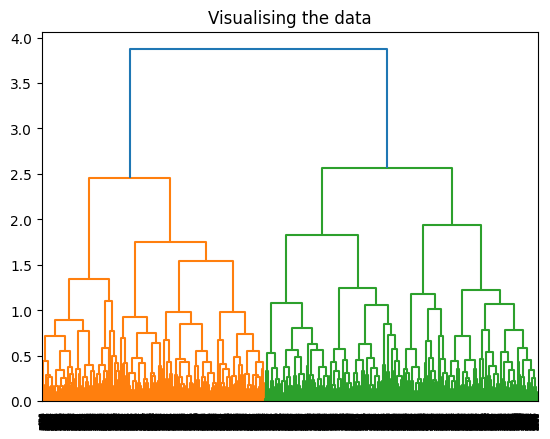

In [27]:
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X,method = 'complete')))

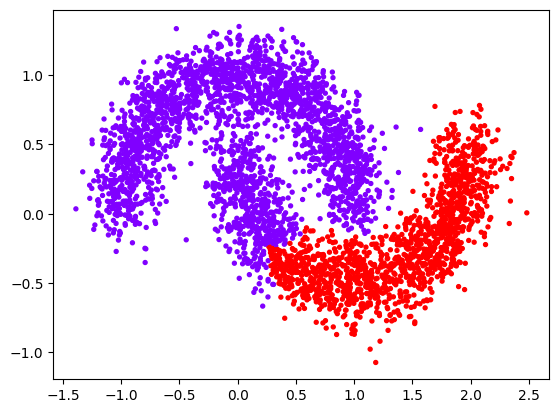

In [28]:
ac2 = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', memory = None,
                              compute_full_tree='auto', linkage= 'average', distance_threshold=None, compute_distances=False)

# visualizing the clustering

plt.scatter(X[:, 0], X[:, 1], c = ac2.fit_predict(X), cmap = 'rainbow', s = 8)
plt.show()

DBSCAN Clustering

Number of clusters: 2


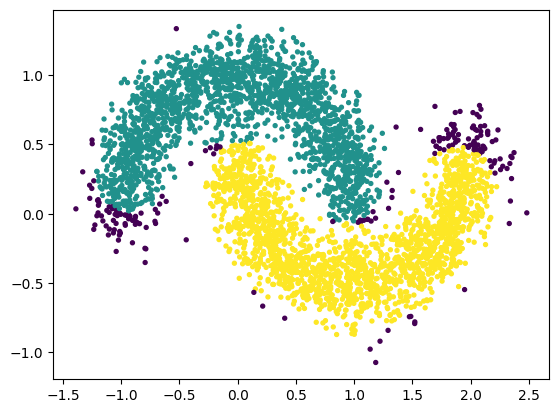

In [29]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 0.3, min_samples = 300).fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = y_pred, s = 8)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))

In [30]:
import sys
np.set_printoptions(threshold = sys.maxsize)

In [31]:
y_pred

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  0,  0,  0,  1,  1,  1,  1,  1,  0, -1,  1,  1,  0,  1,  0,  1,
        1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,
        0,  0,  1, -1, -1,  0,  0,  1,  0,  0,  1, -1,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  1,  1,  0,  1,  1,  1, -1,  1,  1,  0,  0,  1,  1,  0,
        1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1, -1,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  1,  1,  1, -1,  0,
        1,  0, -1,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0, -1,  1,  1,
        1,  0, -1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  1

In [32]:
import sys
np.set_printoptions(threshold = sys.maxsize)

Number of clusters 2
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1
 0 0

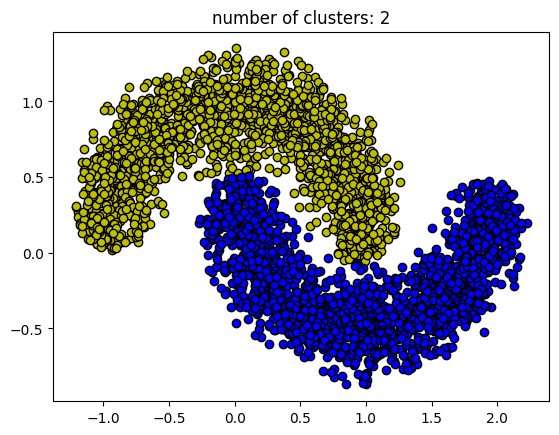

In [33]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 0.3, min_samples = 300).fit(X)
labels = y_pred.labels_
core_samples_mask = np.zeros_like(y_pred.labels_, dtype=bool)
core_samples_mask[y_pred.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters', n_clusters_)

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
# print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        # col = 'k'
        continue

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
y_predicted = np.array([i for i in labels if i != -1])
print(y_predicted)
plt.title('number of clusters: %d' % n_clusters_)
plt.show()




Spectral Clustering

In [34]:
from sklearn.cluster import SpectralClustering

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [37]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters=2, eigen_solver=None, n_components=None,
                                         random_state=None, n_init=10, gamma=1.0, affinity='rbf',
                                         n_neighbors=100, eigen_tol=0.0, assign_labels='kmeans', degree=3,
                                         coef0=1, kernel_params=None, n_jobs=None, verbose=False)

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_normalized)

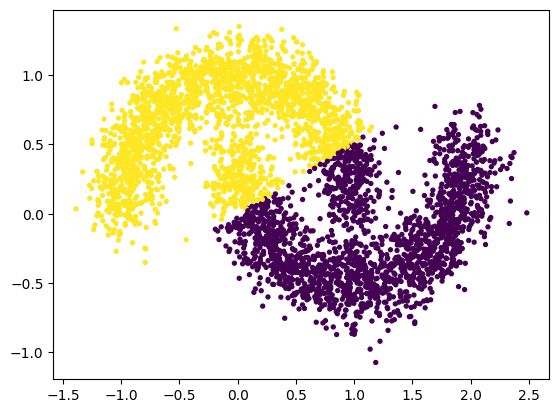

In [38]:
plt.scatter(X[:,0], X[:,1], c=labels_rbf, s=8)
#plt.legend(('Label 0', 'Label 1'))
plt.show()

Gaussian Mixture Model

In [39]:
from sklearn.mixture import GaussianMixture
import numpy as np

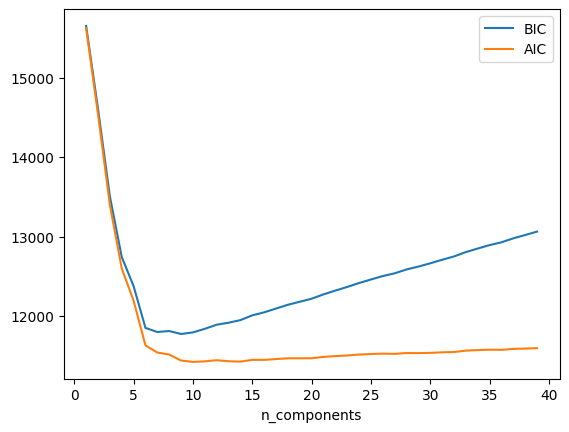

In [40]:
n_components = np.arange(1,40)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label = 'BIC')
plt.plot(n_components, [m.aic(X) for m in models], label = 'AIC')
plt.legend(loc = 'best')
plt.xlabel('n_components');

In [41]:
gmm = GaussianMixture(n_components = 2)
gmm.fit(X)

GaussianMixture(n_components=2)

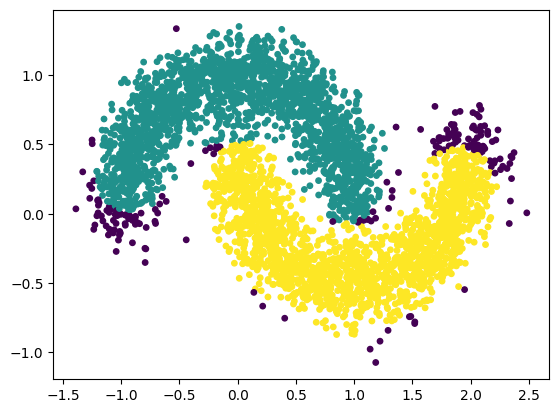

In [42]:
abels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'viridis', s = 15)